# Visión por Computador - Práctica 2 - Deep Learning en Computer Vision

#### 12 puntos   |   Fecha de entrega: 15 de Diciembre, 23:59   |   Forma de entrega: a través de la tarea creada en https://pradogrado2425.ugr.es/

### Estudiante: <mark>MIGUEL ÁNGEL FERNÁNDEZ ALONSO</mark>

# <font color='blue'>**Ejercicio  3: Transfer Learning y fine-tuning con ResNet50 en el SPR X-Ray Age Prediction Challenge (3.5 points)**
<font color='blue'>En este ejercicio trabajaremos con el _SPR X-Ray Age Prediction Challenge_ de Kaggle (https://www.kaggle.com/competitions/spr-x-ray-age/data). Este dataset consta de $10 702$ radiografías de tórax, y el objetivo es predecir la edad de la persona a partir de la imagen de la radiografía. En esta ocasión, se emplearán $6 702$ imágenes para entrenamiento y $4 000$ para test. Las edades oscilan entre los 18 y los 89 años. Para facilitar el trabajo al alumnado se proporciona una versión procesada de los datos (con resolución $224\times224$, en lugar de $1024\times1024$, y empleando solo ejemplos para los cuales se tiene salida deseada (dado que, al tratarse de una challenge de kaggle, el conjunto de test está disponible pero sin etiquetar)). Estos datos se pueden acceder desde: https://drive.google.com/drive/folders/1hCWfTLs1w0h5kObl6NEIhEtH5VDmmCnj?usp=sharing (se debe emplear una cuenta de la UGR para acceder a dicha URL, y la información allí contenida (directorio `spr-x-ray-age`) se debe incluir en la carpeta `Colab Notebooks`).

<font color='blue'>Se debe emplear un $20\%$ de los datos de entrenamiento para validación, y el rendimiento debe ser evaluado, como mínimo, por medio de $MSE$, $MAE$ y $R^2$ _(coefficient of determination) score_. Se deben justificar las decisiones tomadas, como la elección de la función de pérdida. Del mismo modo, es necesario hacer un `summary()` de las arquitecturas empleadas en cada apartado, indicando qué parámetros/capas/bloques son entrenables y cuáles no lo son (es decir, en cada apartado es imprescindible destacar claramente qué arquitectura exacta se está utilizando, así como qué pesos se están entrenando y cuáles se están congelando).

<font color='blue'>Usaremos un modelo ResNet50 pre-entrenado en ImageNet, y tendremos que realizar los siguientes experimentos en relación a la estrategia de entrenamiento:

<font color='blue'>1. Partimos de ResNet50, adaptamos la cabecera (sustituyendo la cabecera anterior por *una única fully-connected* con el número de neuronas de salida adecuado), y reentrenamos (_from scratch_) la red entera para este nuevo problema. Es decir, partimos de pesos aleatorios para resolver este problema de regresión.

<font color='blue'>2. Partimos de ResNet50, adaptamos la cabecera (empleando la misma del apartado anterior), y entrenamos solo la cabecera incorporada. Es decir, ResNet50 se usa como un mero extractor de características, y los pesos que se entrenan son los de la nueva capa incorporada (manteniendo fijos/congelados todos los demás).  

<font color='blue'>3. Partimos de ResNet50, dejamos que fastai incorpore su cabecera por defecto (véase https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw o https://docs.fast.ai/vision.learner.html#head-and-model), y entrenamos solo la cabecera incorporada. Es decir, de nuevo, ResNet50 se usa como extractor de características, y los pesos que se entrenan son los de las nuevas capas incorporadas

<font color='blue'>4. Partimos de ResNet50, adaptamos la cabecera (puede ser la del apartado 3.2 o la del 3.3), y hacemos un ajuste fino de toda la red partiendo de los pesos de ResNet50 (preentrenada en ImageNet).



<font color='blue'>Es importante remarcar que estamos intentando resolver un problema de regresión por medio de la reutilización de un modelo pre-entrenado en un problema de clasificación (ImageNet). ¿Tiene sentido hacerlo? ¿Por qué nos sirven pesos entrenados en clasificación para un problema de regresión? ¿No son, acaso, problemáticas muy diferentes?

<mark>A CUBRIR POR EL ALUMNADO

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━

In [ ]:
# Function to display evaluation metrics
# Developed by Ignacio Oguiza: https://forums.fast.ai/t/plotting-metrics-after-learning/69937

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [ ]:
# defining the paths to images and labels
train_folder = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/train'
test_folder = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/test'
csv_path = 'gdrive/MyDrive/Colab Notebooks/spr-x-ray-age/All_labels.csv'

In [ ]:
if os.path.exists(csv_path):
    print("CSV File exists!")
    # reading the labels dataframe
    df = pd.read_csv(csv_path, dtype=float, index_col=0)
    print(f'Dataframe shape: {df.shape}')
else:
    print("File does not exist.")

CSV File exists!
Dataframe shape: (10702, 1)


In [ ]:
# defining the dataset paths
train_path = Path(train_folder)
test_path = Path(test_folder)

# reading the folders looking for images
train_files = get_image_files(train_path)
test_files = sorted(get_image_files(test_path))

print(f'{len(train_files)} files were found for training and {len(test_files)} files were found for test')

6702 files were found for training and 4000 files were found for test


Age varies from 18.0 to 89.0



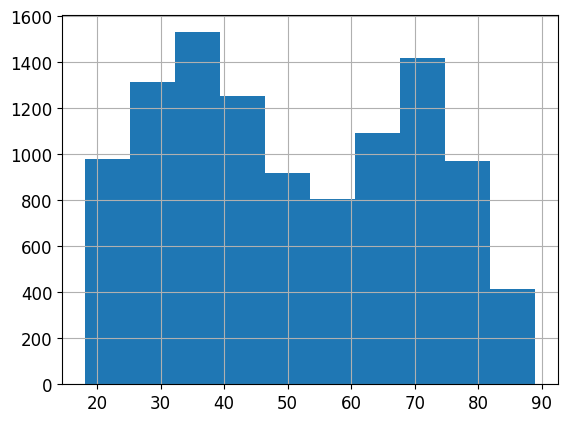

In [ ]:
print(f'Age varies from {df.age.min()} to {df.age.max()}\n')
_=df.age.hist()

EL conjunto de datos ResNet50 en el SPR X-Ray Age es una colección de imágenes de radiografías de tórax. El objetivo es desarrollar un modelo de aprendizaje automático que pueda predecir la edad de una persona basándose en una radiografía de tórax. Este desafío combina el análisis de imágenes médicas con tareas de regresión para estimar una característica continua (edad).

- Número total de imágenes: El conjunto de datos incluye 1072 imágenes en total.
- División de conjuntos: Las imágenes están divididas en conjuntos de entrenamiento y prueba. En concreto, hay 6702 imágenes destinadas al conjunto de entrenamiento y 4000 para el conjunto de prueba.
- Resolución de imágenes: Una versión preprocesada del dataset está disponible, con imágenes redimensionadas a 224×224 píxeles para facilitar el trabajo.
- Rango de edades: Las edades de las personas representadas en las imágenes oscilan entre los 18 y 89 años.
- Características: Solo se incluyen ejemplos para los cuales se tiene una salida deseade, esto simplifica el manejo del dataset.

In [ ]:
# function used to retun the label from an image
def label_func(file):
    # takes the file's base name w/o the extension
    basename = int(os.path.basename(str(file)).split('.')[0])

    # searches for the label
    label = int(df.age[basename])

    return label

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Cargamos las etiquetas
labels_df = pd.read_csv(csv_path)

# Assuming the column containing image IDs is named 'imageId'
# If it's named something else, replace 'imageId' with the actual column name.
labels_df['file_path'] = labels_df['imageId'].apply(lambda x: train_path / f"{x}.png")

#Separamos entrenamiento y validación
train_df, val_df = train_test_split(labels_df, test_size=0.2, random_state=42)

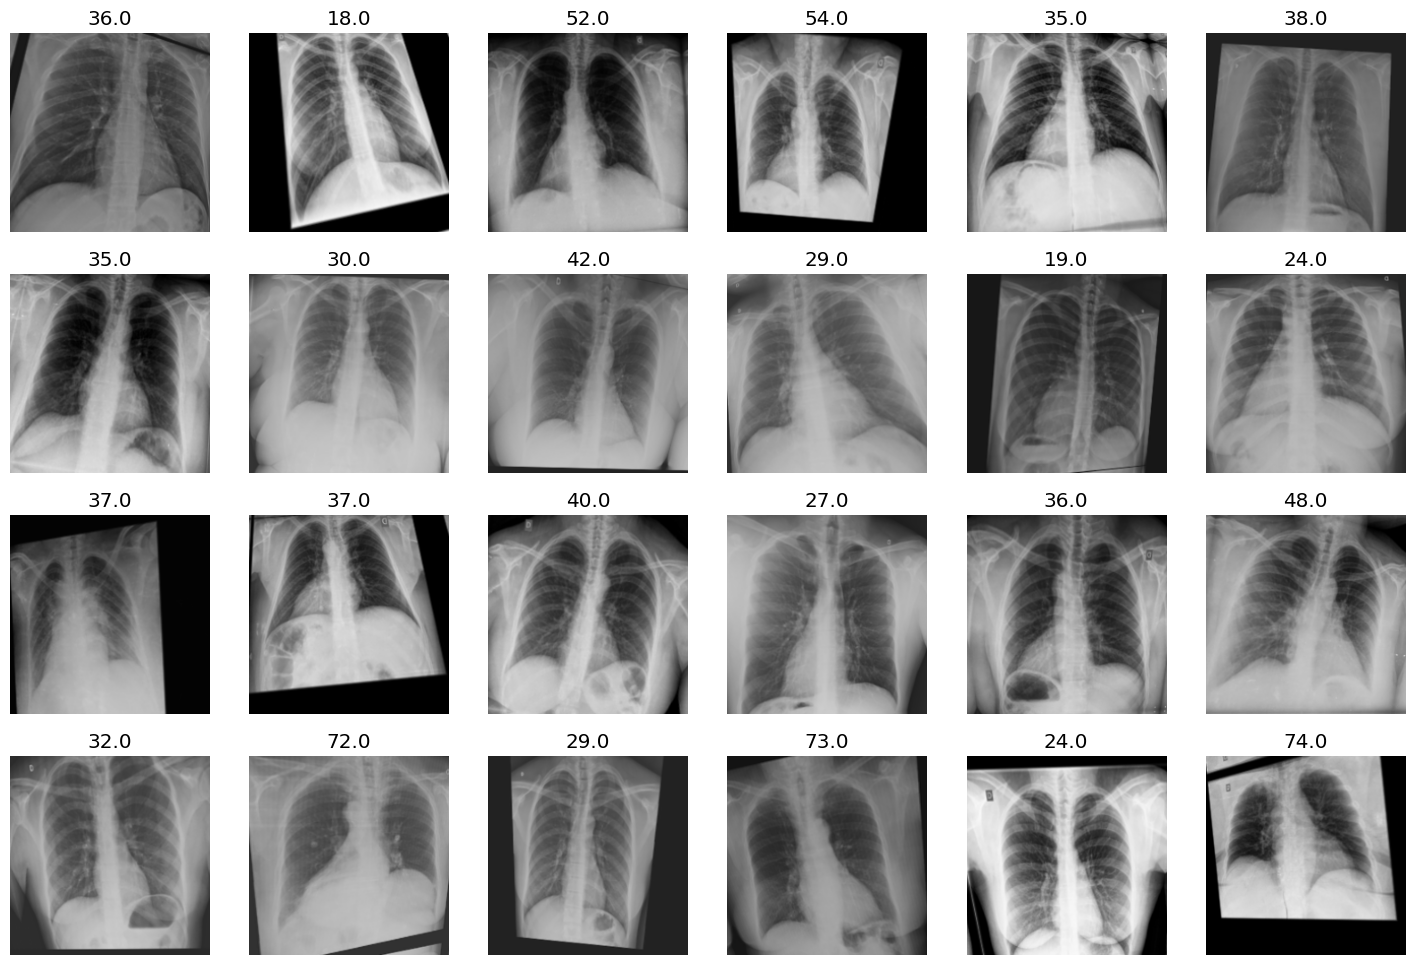

In [ ]:
# defines the image dataloader
dtblk = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=label_func,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, min_scale=0.75) + [Normalize.from_stats(*imagenet_stats)]
    )
dls = dtblk.dataloaders(train_path, bs=32)

# shows some samples
dls.show_batch(max_n=24)

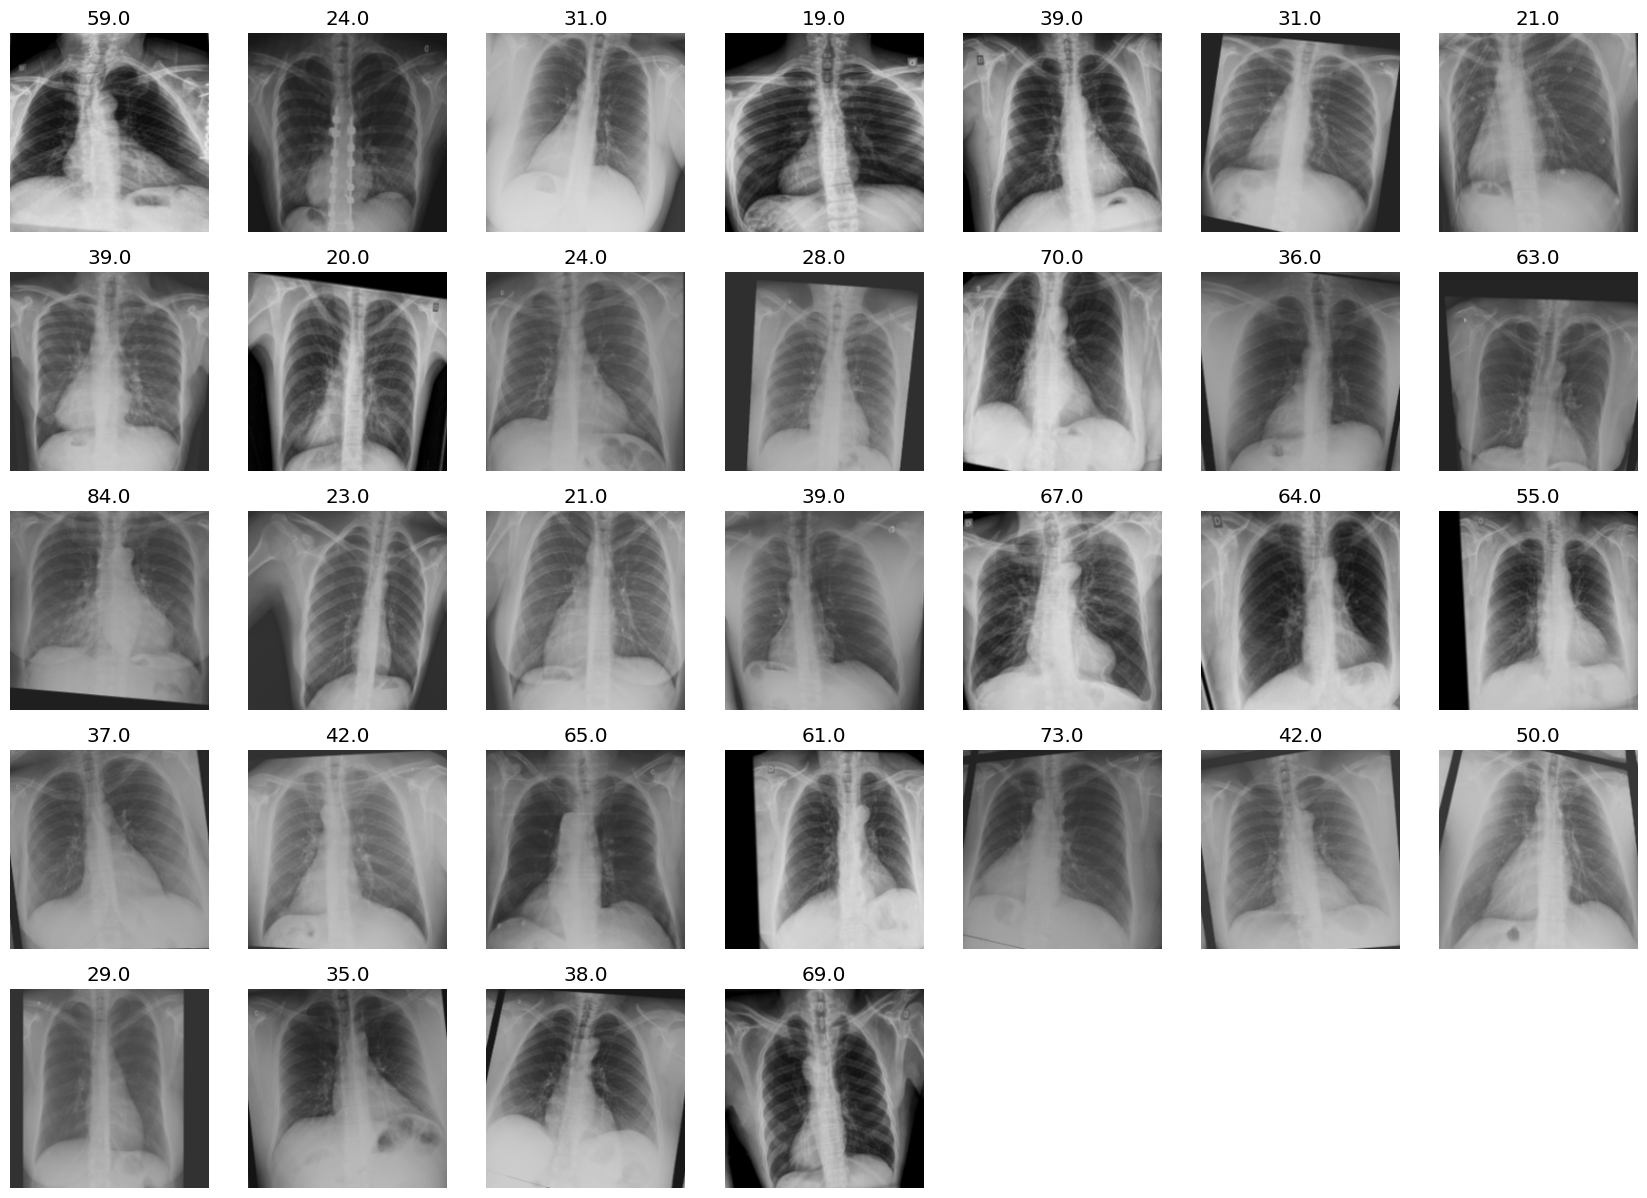

In [ ]:
#Mostramos un batch de imágenes del conjunto de entrenamiento
dls.train.show_batch(max_n=32)

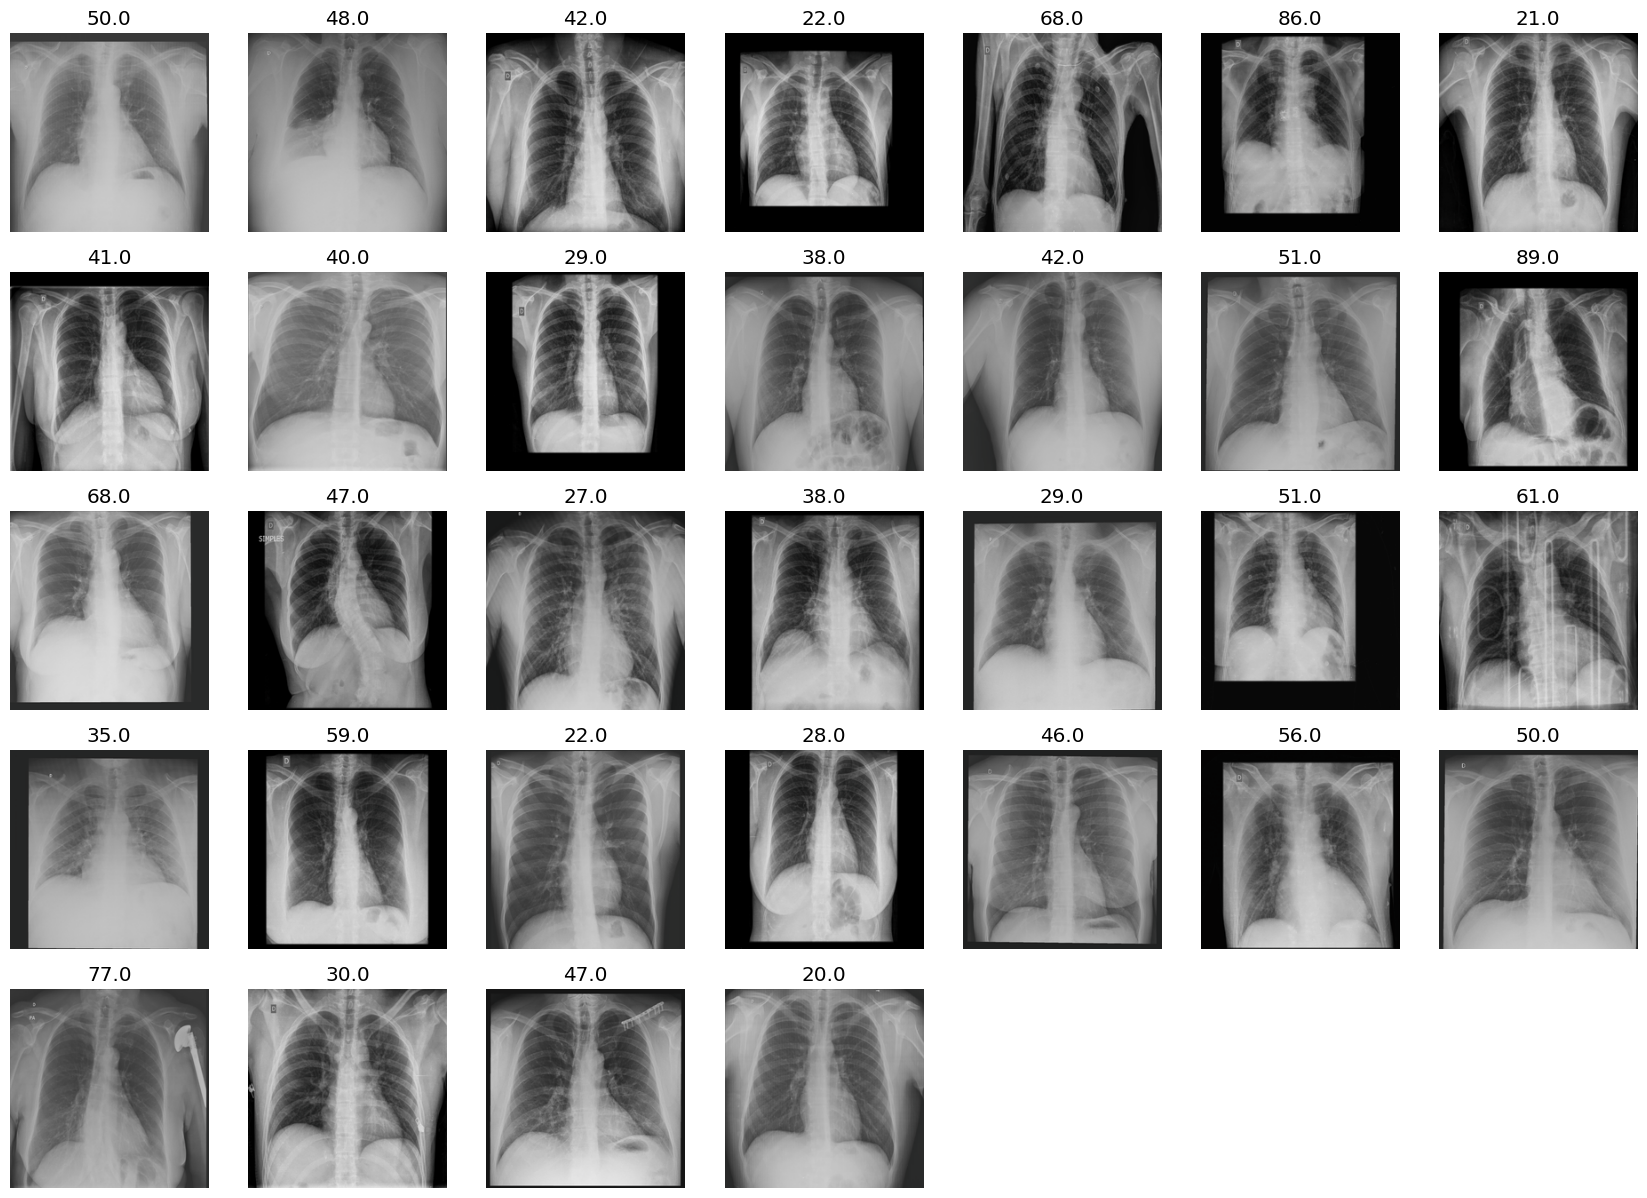

In [ ]:
#Mostramos un batch de imágenes del conjunto de validación
dls.valid.show_batch(max_n=32)

ResNet-50 es una de las arquitecturas más populares de redes neuronales profundas diseñadas para el análisis de imágenes. Fue introducida en el trabajo de Microsoft Research (2015) titulado "Deep Residual Learning for Image Recognition" y es parte de la familia de Redes Residuales (ResNets).

- Arquitectura Residual: ResNet-50 utiliza bloques residuales, que incluyen conexiones de atajo (skip connections). Estas conexiones ayudan a mitigar el problema del gradiente desvaneciente y permiten un entrenamiento más eficiente de redes profundas.
Un bloque residual aprende la diferencia o "residuo" entre la entrada y la salida, en lugar de intentar aprender directamente la transformación completa.

- Profundidad: La red tiene 50 capas entrenables (profundidad):
49 capas con pesos (convoluciones y capas totalmente conectadas).
1 capa final softmax para la predicción.
Estas 50 capas se organizan en una jerarquía de bloques residuales.

- Estructura Detallada: ResNet-50 está formada por bloques residuales que incluyen: 1 capa de convolución inicial:
Una convolución de tamaño
7x7 con 64 filtros, seguida de una capa de max pooling. 4 grupos principales de bloques residuales, con capas convolucionales de tamaños 1×1, 3×3, y 1×1 dentro de cada bloque.
Distribución de bloques residuales:
Grupo 1: 3 bloques
Grupo 2: 4 bloques
Grupo 3: 6 bloques
Grupo 4: 3 bloques
Capas finales: Un promedio global (global average pooling) seguido de una capa completamente conectada y softmax.

- Parámetros: Número total de parámetros: aproximadamente 25.6 millones. Utiliza un enfoque de diseño eficiente para minimizar el número de parámetros manteniendo un alto rendimiento.

- Dimensiones de Entrada: Típicamente, la red acepta imágenes de tamaño 224 x 224 x 3.

- Ventajas: Mitigación de gradiente desvaneciente: Gracias a las conexiones de atajo. Profundidad manejable: ResNet-50 es suficientemente profunda para capturar patrones complejos sin volverse intratable para entrenar.
Transferencia de aprendizaje: Muy útil como modelo preentrenado en grandes datasets como ImageNet. Es común adaptarla a problemas específicos usando fine-tuning

- Rendimiento: ResNet-50 logra resultados de alta precisión en tareas de clasificación de imágenes, alcanzando un rendimiento competitivo en benchmarks como ImageNet.


In [ ]:
#Mostramos la arquitectura de ResNet50 (FastAI ya proporciona un modelo preentrenado en ImageNet con ResNet50)
models.resnet50()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

En este caso el "head" de la arquitectura ResNet50 está compuesto por la capa completamente conectada que tiene la siguiente configuración:

(fc): Linear(in_features=2048, out_features=1000, bias=True)

donde in_features representa la dimensionalidad de las características de entrada a la capa completamente conectada, que es 2048 en este caso. Esto se debe a que la capa anterior a la capa completamente conectada es una capa de pooling adaptativo (AdaptiveAvgPool2d(output_size=(1, 1))), que reduce las dimensiones espaciales de las características a 1x1, pero mantiene 2048 canales. Por otro lado, out_features representa la dimensionalidad de la salida de la capa completamente conectada, que es 1000 en este caso. Esto es común en arquitecturas preentrenadas de ResNet50, ya que originalmente se entrenaron en el conjunto de datos ImageNet que tiene 1000 clases.

### **El uso de ResNet50** como extractor de características:

---

### **1. Reentrenamiento completo desde cero ("from scratch")**
1. **Eliminar la cabecera existente**:  
   Se sustituye la capa de clasificación final por una nueva capa totalmente conectada (**fully connected**) con una salida adecuada para el problema, en este caso, **una neurona** (si la tarea es regresión, como predicción de edad).
   
2. **Inicializar los pesos aleatoriamente**:  
   No se aprovechan los pesos preentrenados. Todo el modelo, incluyendo las capas convolucionales, se inicializa con valores aleatorios.

3. **Entrenamiento completo**:  
   - Se entrena toda la red (capas convolucionales + nueva cabecera) desde cero.  
   - Este enfoque requiere grandes volúmenes de datos y alta capacidad computacional, ya que no se reutilizan representaciones previamente aprendidas.

---

### **2. Uso de ResNet50 como extractor de características (cabecera personalizada y congelación)**
1. **Sustituir la cabecera**:  
   La cabecera original de ResNet50 se reemplaza por una nueva capa totalmente conectada adecuada para el problema (como en el apartado anterior).

2. **Congelar los pesos de ResNet50**:  
   Se congelan las capas convolucionales de ResNet50 (es decir, no se actualizan sus pesos durante el entrenamiento). Esto permite usarla como extractor de características, aprovechando los patrones aprendidos previamente.

3. **Entrenar la cabecera**:  
   Solo los pesos de la nueva cabecera se actualizan durante el entrenamiento. Este método es más eficiente y requiere menos datos que el entrenamiento desde cero.

---

### **3. Uso de la cabecera por defecto de `fastai` y ResNet50 como extractor de características**
1. **Integrar ResNet50 con `fastai`**:  
   - Usando las herramientas de `fastai`, se carga ResNet50 como base y se deja que `fastai` agregue automáticamente una cabecera estándar adecuada para la tarea.
   - La cabecera por defecto generalmente incluye una capa de *pooling* adaptativa seguida de una o más capas totalmente conectadas.

2. **Congelar ResNet50**:  
   Las capas convolucionales de ResNet50 permanecen congeladas para actuar como extractor de características.

3. **Entrenar solo la cabecera**:  
   - Los pesos de las capas añadidas por `fastai` son los únicos que se entrenan.
   - Este método es similar al anterior, pero permite aprovechar optimizaciones específicas de `fastai`.

---

### **4. Ajuste fino de toda la red con pesos preentrenados**
1. **Partir de ResNet50 preentrenada en ImageNet**:  
   Se utiliza el modelo ResNet50 con pesos preentrenados para aprovechar las representaciones generales aprendidas a partir de imágenes.

2. **Reemplazar o ajustar la cabecera**:  
   - Se utiliza una cabecera personalizada (como en los apartados 2 o 3).  
   - La salida final debe ser adecuada para la tarea, en este caso, regresión (una neurona).

3. **Ajuste fino (fine-tuning)**:  
   - Inicialmente, las capas convolucionales pueden mantenerse congeladas mientras se entrena la cabecera.  
   - Luego, se descongelan las capas convolucionales y se reentrena toda la red con una tasa de aprendizaje más baja para evitar sobrescribir los pesos preentrenados.  
   - Este enfoque busca especializar las representaciones aprendidas en el dataset específico del problema.

---

### Comparación de los métodos:
- **Desde cero (1)**: Mayor flexibilidad, pero computacionalmente costoso y requiere grandes datasets.
- **Extractor de características (2 y 3)**: Más eficiente, útil para datasets pequeños o moderados, y se beneficia de patrones previamente aprendidos.
- **Ajuste fino (4)**: Balancea eficiencia y precisión, maximizando el uso de pesos preentrenados mientras permite especialización.



### Métricas Usadas:

1. MSE (Mean Squared Error)
El MSE mide el promedio de los cuadrados de los errores entre los valores reales ($y_i$) y las predicciones del modelo $\hat{y}$

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Características:
- Penaliza los errores grandes más que los pequeños, ya que los errores se elevan al cuadrado.
- Su unidad es el cuadrado de la variable objetivo.
- Un MSE menor indica mejor desempeño del modelo.


2. MAE (Mean Absolute Error):
El Mae mide el promedio de los valores absolutos de los errores entre los valores reales y las predicciones.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$$

Características:
- Es más robusto ante valores atípicos que el MSE, ya que no eleva los valores al cuadrado.
- Su unidad es la misma que la variable objetivo.
- Un MAE menor indica mejor desempeño del modelo.


3. $R^2$ (Coefficient of Determination):
El $R^2$ mide la proporción de la varianza total en los datos reales ($y$) que el modelo es capaz de explicar. Un $R^2$ indica mejor ajuste del modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Donde:
- $y_i$: valor real
- $\hat{y}$: valor predicho
- $\bar{y}$: promedio de los valores reales

Interpretación:
- $R^2 = 1$: El modelo explica toda la varianza de los datos (caso perfecto).
- $R^2 = 0$: El modelo no explica mejor que predecir siempre el promedio ($\bar{y}$).
- $R^2 < 0$: El modelo es peor que predecir siempre el promedio.

## <font color='blue'>3.1 Entrenamos todo ResNet50 _from scratch_, ajustando la cabecera para este problema.

Algunas consideraciones clave relacionadas con el entrenamiento desde cero y el *fine-tuning* con modelos preentrenados son las siguientes:

- **Inicialización de pesos**: En el entrenamiento desde cero, los pesos de la red se inicializan de forma aleatoria, lo que puede resultar en un proceso de aprendizaje más lento. Además, existe el riesgo de que el modelo quede atrapado en mínimos locales subóptimos al inicio del entrenamiento.

- **Tamaño del conjunto de datos**: Entrenar una red desde cero requiere generalmente grandes conjuntos de datos para que el modelo aprenda patrones representativos. En cambio, el *fine-tuning* con un modelo preentrenado aprovecha conocimientos previos adquiridos en tareas relacionadas (por ejemplo, ImageNet), permitiendo aplicar este modelo a problemas con conjuntos de datos más pequeños, como es nuestro caso.

- ***Transfer learning***: El *fine-tuning* utiliza un modelo preentrenado como punto de partida, ajustando sus pesos para adaptarse a una tarea específica. Esto facilita una convergencia más rápida y suele proporcionar mejores resultados, incluso cuando se dispone de menos datos.

- **Tiempo de entrenamiento**: Entrenar desde cero requiere considerablemente más tiempo y recursos computacionales, ya que todos los pesos de la red deben ajustarse desde el inicio. En contraste, el *fine-tuning* es mucho más eficiente, dado que parte de una red ya optimizada.



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explici

Optimal Learning Rate: 0.003631


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

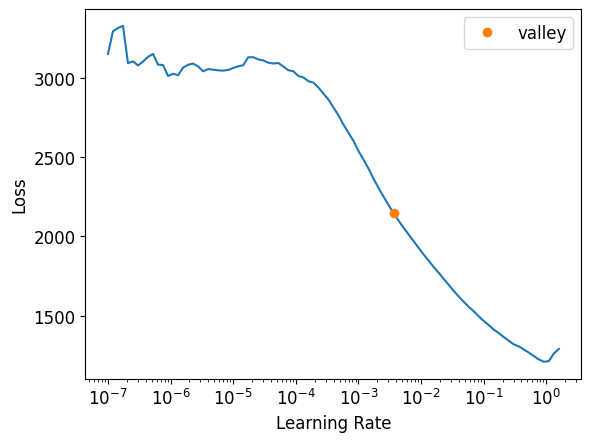

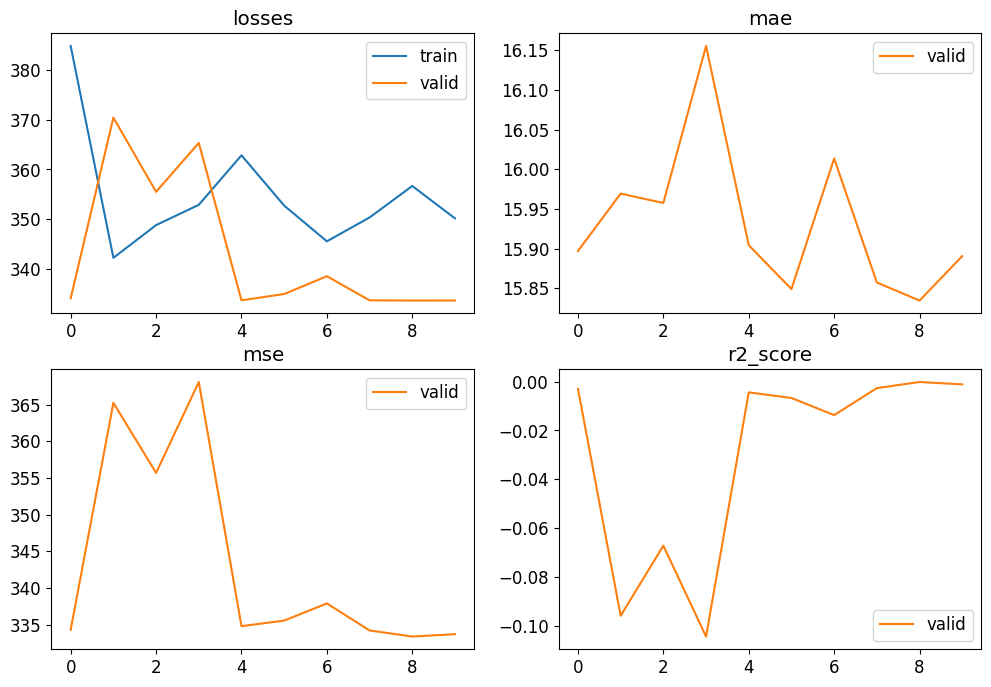


Métricas finales en validación:
MAE: 333.5628
MSE: 15.8906
R²: 333.7152



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

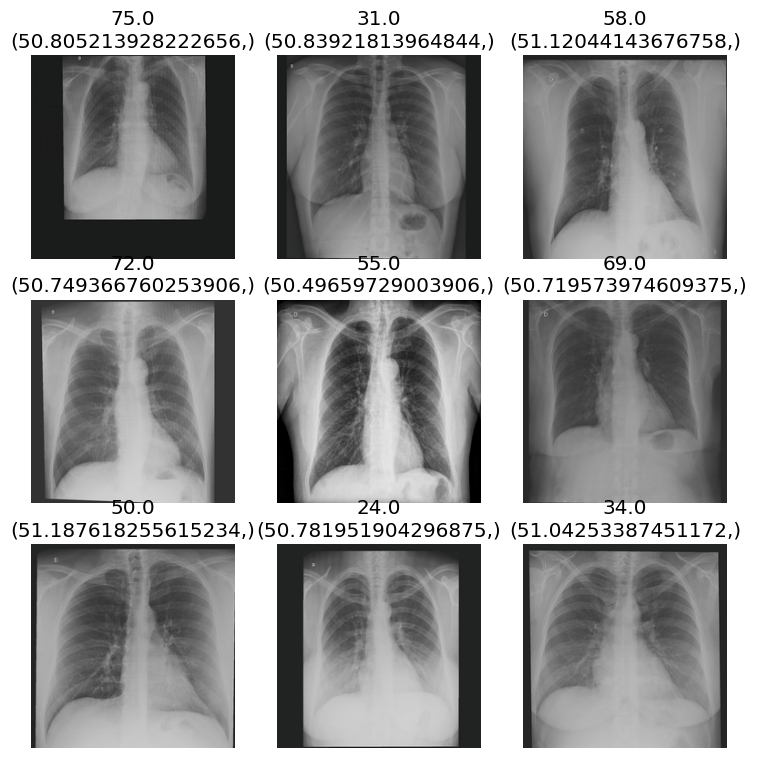

In [ ]:
#Nuevo head (capa fully-connected con dimensionalidad adapatada)
#El número de salidas para el problema de regresión es 1 (para edad)

custom_head = sequential(
    nn.AdaptiveAvgPool2d(1),                                                    # Mantiene la agregación global de características
    nn.Flatten(),                                                               # Convierte a un vector unidimensional
    nn.Linear(in_features=2048, out_features=1)                                 # Fully-connected
)

#Objeto vision_learner (por defecto pretrained=Tue, lo cambiamos a False para entrenar desde cero)
learn = vision_learner(dls,                                                     # DataLoader previamente definido
                       models.resnet50,                                         # ResNet50 como modelo base
                       pretrained=False,                                        # Parámetro cambiado a False para entrenar desde cero
                       loss_func=nn.MSELoss(),                                  # Función de pérdida para regresión
                       metrics=[mae, mse, R2Score()],                           # Métricas de evaluación
                       train_bn=False,                                          # Congela batch norm si lo deseamos
                       custom_head=custom_head)                                 # Nueva cabecera personalizada

#Encontrar el valor óptimo del Learning Rate (lr)
lr = learn.lr_find()
print(f'Optimal Learning Rate: {lr[0]:.6f}')

#Entrenar el modelo usando el optimizador One-Cycle
learn.fit_one_cycle(n_epoch=10, lr_max=lr[0])

# Mostrar la curva de pérdidas y métricas
learn.recorder.plot_metrics()


# Obtener y mostrar métricas finales en el conjunto de validación
final_metrics = learn.recorder.values[-1]
print(f'\nMétricas finales en validación:')
print(f'MAE: {final_metrics[1]:.4f}')
print(f'MSE: {final_metrics[2]:.4f}')
print(f'R²: {final_metrics[3]:.4f}\n')

# Mostrar resultados tras el entrenamiento del modelo
learn.show_results()

# Mostrar todos los detalles del objeto vision_learner
learn.summary()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


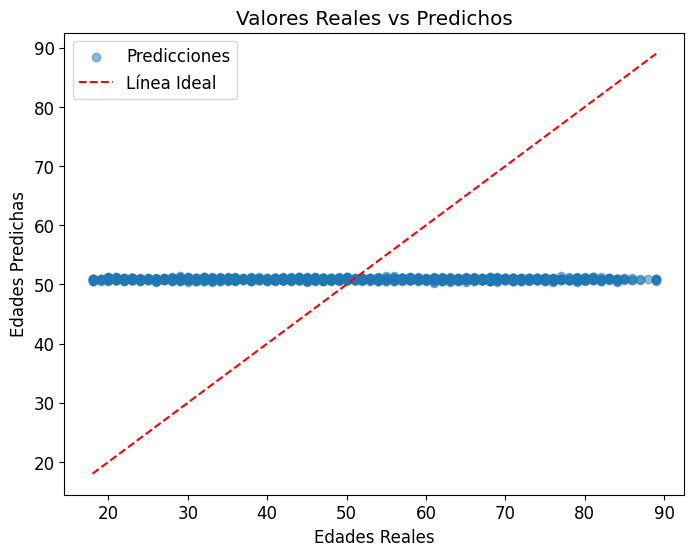

In [ ]:
# Obtener predicciones y valores reales
preds, targs = learn.get_preds(dl=dls.valid)

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(targs, preds, alpha=0.5, label="Predicciones")
plt.plot([targs.min(), targs.max()], [targs.min(), targs.max()], 'r--', label="Línea Ideal")
plt.xlabel("Edades Reales")
plt.ylabel("Edades Predichas")
plt.title("Valores Reales vs Predichos")
plt.legend()
plt.show()

## 3.1.1. Análisis de los resultados

- Loss en Training: 350.131195
- Loss en Validation: 333.562836
- MSE: 333.5628
- MAE:15.8906
- R2 score: -0.001145

Vamos a analizar estos datos.

- La pérdida en validación es más baja que en entrenamiento, esto ocurre ya que el modelo está subentrenado y tiene capacidad para mejorar en el conjunto de entrenamiento.
- MSE (Mean Squared Error): 333.56. Este valor indica que el promedio de los cuadrados de las diferencias entre las edades reales y las predichas es 333.56 (años al cuadrado), la raíz sería apróximadamente de 18.26 años, lo cual significa que el modelo tiene un error promedio de ±18.26 años, dado que las edades varían entre 18 y 89 años este error es bastante alto, representando un 25.7 del rango total.
- MAE (Mean Absolute Error): 15.89. Esta métrica mida el error absoluto promedio en las predicciones, las predicciones están lejos de las edades reales en promedio.
- R2 score: -0.0011. Esta métrica mide cuánto de la variabilidad de los datos reales es explicada por el modelo. El valor obtenido en este caso significa que le modelo no explica prácticamente nada de la variabilidad en los datos. Además, un valor negativo indica que el modelo tiene peor desempelo que un modelo base que siempre predice la media de las edades.

## <font color='blue'>3.2. ResNet50 se usa como extractor de características: Entrenamos solo la cabecera incorporada.



La función central en el ejercicio 3 es `vision_learner(dls, arch)`, diseñada para facilitar el *transfer learning* en tareas de visión por computadora. Esta función integra herramientas esenciales para construir un modelo adecuado. A continuación, se detallan los parámetros principales de esta función:

- **`dls`**: DataLoader que contiene los conjuntos de datos para entrenamiento, validación y, opcionalmente, prueba.
  
- **`arch`**: Arquitectura base del modelo, como ResNet50 en este caso, o una arquitectura personalizada.

- **`n_out`**: Dimensión de la capa de salida del modelo, que corresponde al número de clases o etiquetas.

- **`pretrained`**: Especifica si se deben usar pesos preentrenados en la arquitectura base. Por defecto, `pretrained = True`.

- **`loss_func`**: Función de pérdida que define cómo el modelo mide el error y ajusta sus pesos.

- **`opt_func`**: Función de optimización utilizada para actualizar los pesos del modelo.

- **`lr`**: Tasa de aprendizaje inicial del entrenamiento.

- **`splitter`**: Función opcional que divide los parámetros del modelo en diferentes grupos para entrenarlos con distintas políticas de aprendizaje.

- **`cbs`**: Lista de *callbacks* para personalizar el entrenamiento, como Early Stopping o Monitoreo de Métricas.

- **`metrics`**: Métricas usadas para evaluar el rendimiento del modelo, como accuracy o pérdida en validación.

- **`train_bn`**: Indica si los parámetros de *batch normalization* deben ser entrenados. Útil en transfer learning.

- **`cut`**: Índice opcional para truncar la arquitectura base y personalizar la estructura del modelo.

- **`custom_head`**: Capa personalizada que sustituye la cabeza (head) predeterminada de la arquitectura.

Esta función simplifica el proceso de crear modelos de aprendizaje profundo robustos y eficientes. Para obtener más detalles, se puede consultar la documentación oficial de FastAI:  
[Documentación de `vision_learner`](https://docs.fast.ai/vision.learner.html#vision_learner)

Si queremos añadir un nuevo *head* a la arquitectura ResNet50, simplemente debemos definir este *head* y pasarlo como parámetro en la función `vision_learner()` utilizando el argumento `custom_head`.


Para manejar el congelamiento de pesos durante el entrenamiento, FastAI ofrece las funciones `Learner.freeze()` y `Learner.freeze_to(n)`:

- **`Learner.freeze()`**: Congela todas las capas del modelo excepto las finales, incluyendo cualquier capa adicional que se haya añadido (como un nuevo clasificador).
- **`Learner.freeze_to(n)`**: Congela todas las capas hasta la capa número `n`, dejando sin congelar las capas posteriores a esta.

En este caso, gracias a la funcionalidad que proporciona `vision_learner()`, no es necesario usar explícitamente estas funciones, ya que dicha función congela automáticamente todos los pesos de la red, excepto los del *head*.

Por otro lado, en las capas BatchNormalization, los parámetros internos (*running mean* y *running variance*) se actualizan de forma predeterminada. Si deseamos evitar que estos se adapten durante el entrenamiento (como es nuestro caso), es necesario especificar el parámetro `train_bn = False` en la función `vision_learner()`.

Para más detalles sobre la importancia de congelar los parámetros internos de las capas BatchNormalization en este contexto, se puede consultar la siguiente referencia:

[4] https://stackoverflow.com/questions/63016740/why-its-necessary-to-frozen-all-inner-state-of-a-batch-normalization-layer-when

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 197MB/s]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explici

LEARNING RATE: 0.057544


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

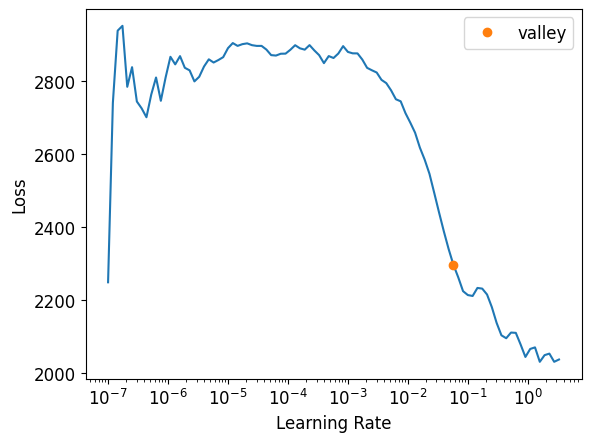

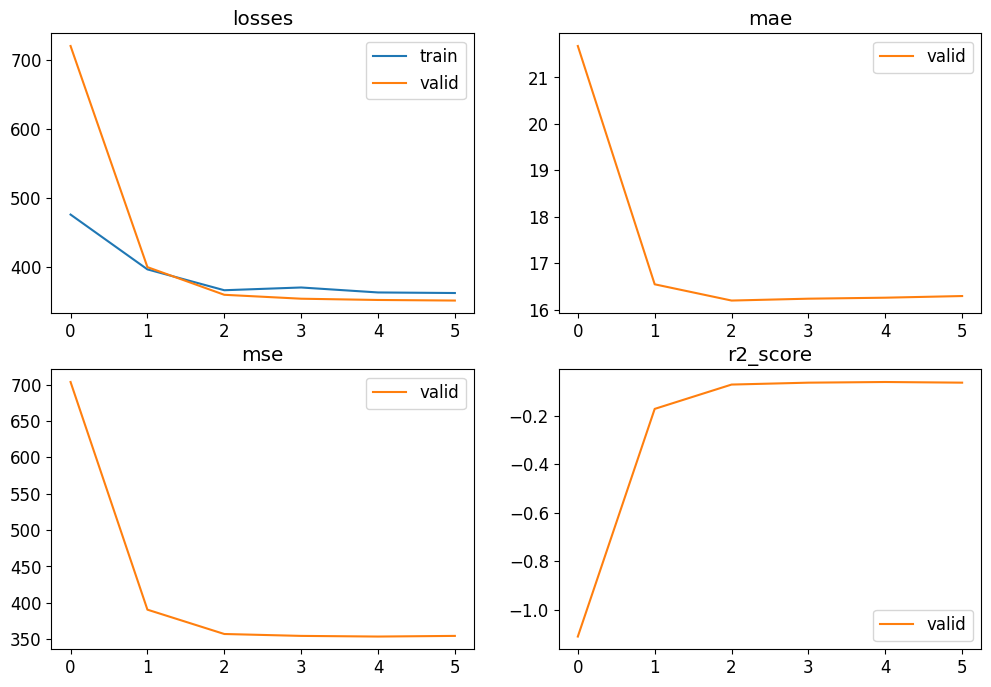


Métricas finales en validación:
MAE: 350.6206
MSE: 16.2944
R²: 354.5857



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

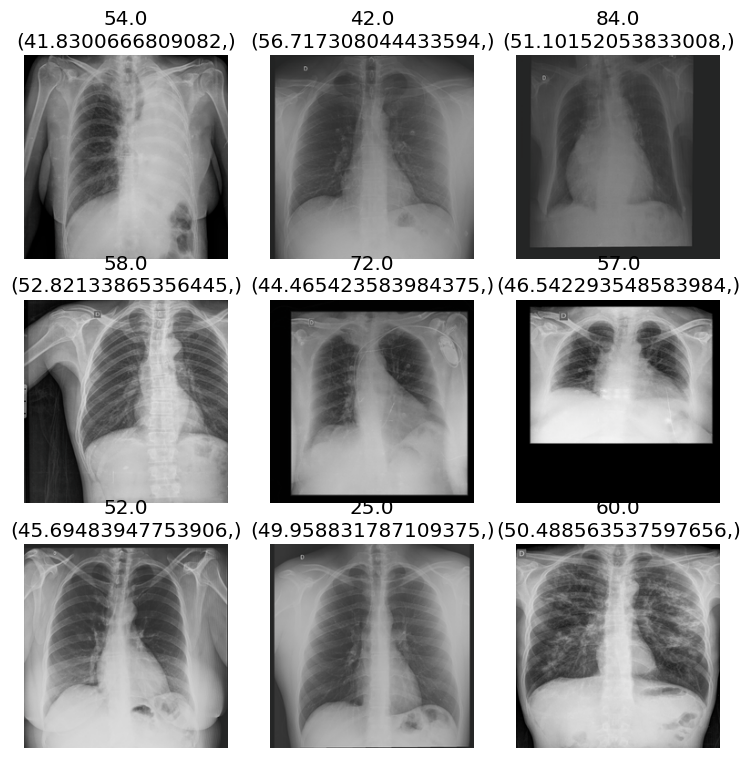

In [ ]:
# Nuevo head (capa fully-connected con dimensionalidad adaptada a nuestro problema)
custom_head = sequential(
    nn.AdaptiveAvgPool2d(output_size = (1, 1)),                                 # Esta capa de la arquitectura original de ResNet50 también la elimina la función vision_learner(), por lo que la mantenemos en el nuevo head
    nn.Flatten(),                                                               # Pasamos de tensor tridimensional a tensor unidimensional
    nn.Linear(in_features=2048, out_features=1)                                 # Capa fully-connected con dimensionalidad de salida adaptada a nuestro problema
)

# Objeto vision_learner (pretrained = True)
learn = vision_learner(dls,                                                     # DataLoader previamente definido
                       models.resnet50,                                         # ResNet50 como modelo base
                       loss_func=nn.MSELoss(),                                  # Función de pérdida para regresión
                       metrics=[mae, mse, R2Score()],                           # Métricas de evaluación
                       train_bn=False,                                          # Congela batch norm si lo deseamos
                       custom_head=custom_head)                                 # Nueva cabecera personalizada

# Encontrar el valor óptimo del learning rate
lr = learn.lr_find()
print(f'LEARNING RATE: {lr[0]:.6f}')

# Entrenar el modelo usando el optimizador One-Cycle
learn.fit_one_cycle(n_epoch=6, lr_max=lr[0])


learn.recorder.plot_metrics()


# Obtener y mostrar métricas finales en el conjunto de validación
final_metrics = learn.recorder.values[-1]
print(f'\nMétricas finales en validación:')
print(f'MAE: {final_metrics[1]:.4f}')
print(f'MSE: {final_metrics[2]:.4f}')
print(f'R²: {final_metrics[3]:.4f}\n')

# Mostrar resultados tras el entrenamiento del modelo
learn.show_results()

# Mostrar todos los detalles del objeto vision_learner
learn.summary()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


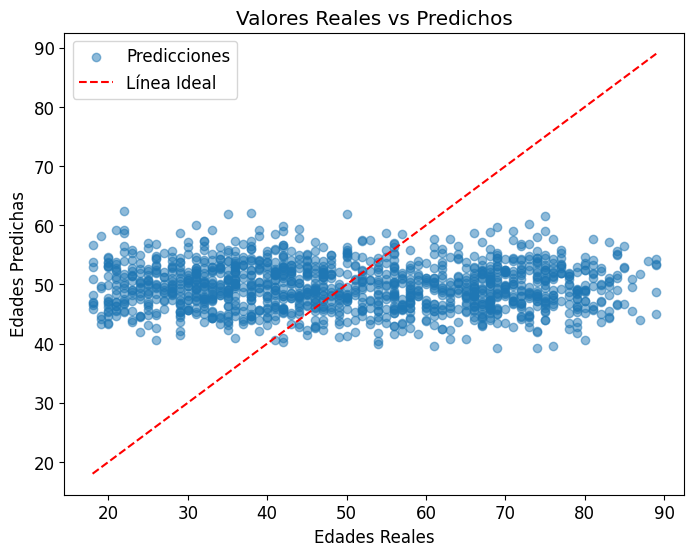

In [ ]:
# Obtener predicciones y valores reales
preds, targs = learn.get_preds(dl=dls.valid)

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(targs, preds, alpha=0.5, label="Predicciones")
plt.plot([targs.min(), targs.max()], [targs.min(), targs.max()], 'r--', label="Línea Ideal")
plt.xlabel("Edades Reales")
plt.ylabel("Edades Predichas")
plt.title("Valores Reales vs Predichos")
plt.legend()
plt.show()

## 3.2.1. Análisis de los resultados

- Loss en Training: 361.559418
- Loss en Validation: 350.620605
- MSE: 354.585724
- MAE: 16.294430
- R2 score: -0.063757

Vamos a analizar estos datos:
- La pérdida en validación es ligeramente inferior a la de entrenamiento, lo cual puede idicar que el modelo no está sufriendo un overfitting significativo. Sin embargo, la diferencia no es suficientemente grande para sugerir un subajuste claro. El modelo parace estar encontrando un equilibrio, aunque los valores absolutos de las pérdidas son bastante altos.

- MSE (Error Cuadrático Medio): 354.585724. En el contexto de nuestro problema indica que el error promedio al cuadrado entre las edades reales y predichas es de aproximadamente 354.59 unidades. La raíz sería de aproximadamente 18.59, lo cual significa que el modelo tiene un error promedio de ±18.59 años, dado que las edades varían entre 18 y 89 años este error es bastante alto.
- MAE (Error Absoluto Medio): 16.294430. Este valor indica que en promedio el modelo se desvía de la edad real por 16.29 años. Este resultado es alto considerando que las edades oscilan entre 18 y 89 años, esto, sugiere que el modelo no está capturando bien la relación entre las características extraídas y las edades.

- R2 Score (Coeficiente de Determinación): -0.063757. El valor de R2 es negativo, lo que sugiere que el modelo no está explicando la variabilidad de las edades mejor que la media de los datos. Predecir simplemente la media de las edades reales sería más efectivo que el modelo actual. El modelo está fallando al capturar relaciones importantes entre las características de entrada y las edades.

Comparación con la red completa from scracth:
En el análisis previo, al entrenar toda la ResNet50 desde cero, los resultados mostraron:

- MSE: 333.56
- MAE: 15.89
- R²: -0.001

Esto indica que entrenar la red completa from scratch fue ligeramente más efectivo que usarla como extractor de características, pero aún insuficiente para obtener un rendimiento aceptable. Está claro que ambos enfoques necesitan ajustes adicionales para ser efectivos en este problema.


## <font color='blue'>3.3. ResNet50 se usa como extractor de características: Entrenamos solo la cabecera incorporada por defecto por fastai.



En este apartado, basta con utilizar la función `vision_learner()` sin necesidad de invocar explícitamente la función `create_head()` de FastAI. Esto se debe a que, al llamar a `vision_learner()`, FastAI reemplaza automáticamente el *head* original del modelo por un nuevo *head* adaptado a las dimensiones del problema definido por `dls`. Este proceso incluye la creación de un *head* predeterminado que FastAI integra al modelo. Internamente, `vision_learner()` utiliza `create_vision_model()` para llevar a cabo esta modificación, reemplazando el *head* original con el siguiente diseño por defecto:

    Sequential(
         (0): AdaptiveConcatPool2d(
              (ap): AdaptiveAvgPool2d(output_size=1)
              (mp): AdaptiveMaxPool2d(output_size=1)
         )
         (1): Flatten(full=False)
         (2): BatchNorm1d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (3): Dropout(p=0.25, inplace=False)
         (4): Linear(in_features=768, out_features=512, bias=False)
         (5): ReLU(inplace=True)
         (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         (7): Dropout(p=0.5, inplace=False)
         (8): Linear(in_features=512, out_features=num_clases_de_nuestro_problema (200 en nuestro caso), bias=False)
    )
En este head por defecto de FastAI podemos observar capas de pooling adaptativo, normalización por lotes, dropout y capas completamente conectadas con funciones de activación ReLU. La última capa lineal produce la salida final del modelo.

Pueden ser de utilidad los siguientes enlaces:

[5] https://docs.fast.ai/vision.learner.html#head-and-model

[6] https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 104MB/s]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explici

LEARNING RATE: 0.047863


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

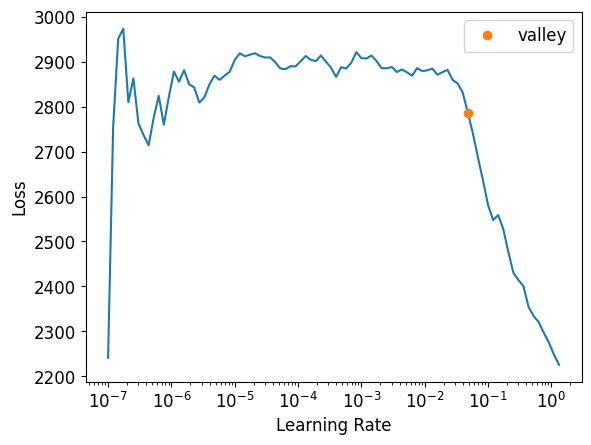

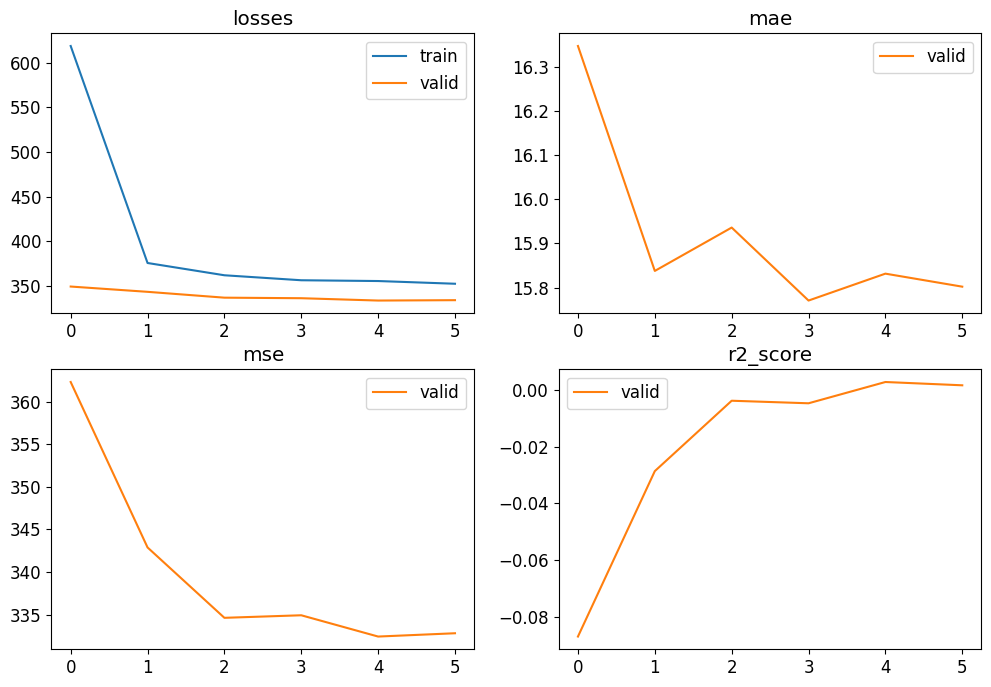


Métricas finales en validación:
MAE: 333.8354
MSE: 15.8020
R²: 332.8112



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        False     
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        False     
Conv2d                                    36864      False     
BatchNorm2d                               128        False     
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      False     
BatchNorm2d                        

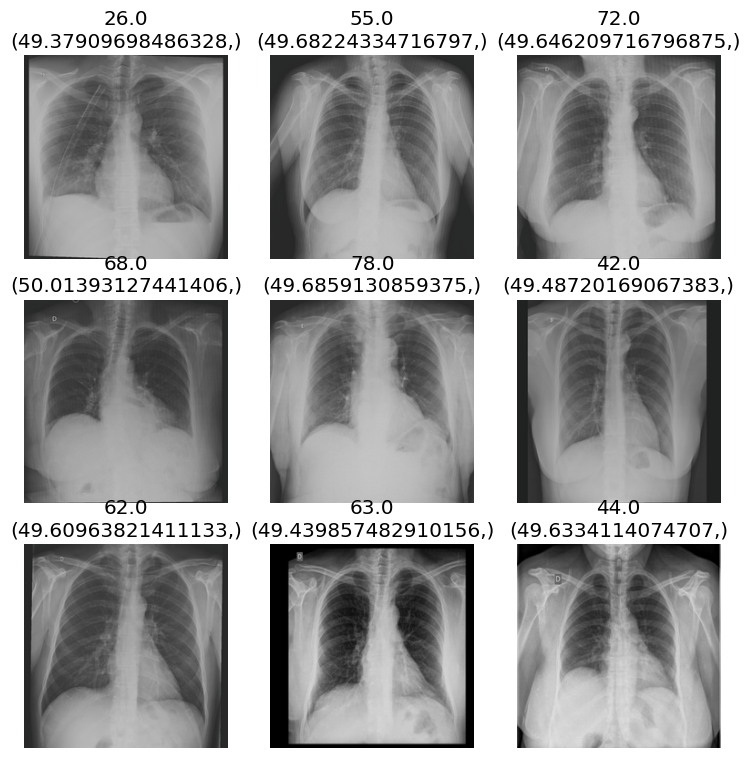

In [ ]:
#Objeto vision_learner (por defecto, pretrained = True). Se sustituye la última capa fully-connected de ResNet50 por el head por defecto de FastAI con una dimensionalidad adaptada
learn = vision_learner(dls,
                       models.resnet50,
                       loss_func = nn.MSELoss(),
                       metrics = [mae, mse, R2Score()],
                       train_bn = False)

#Encontrar el valor óptimo del learning rate (lr)
lr = learn.lr_find()
print(f'LEARNING RATE: {lr[0]:.6f}')

#Entrenar el modelo usando el optimizador One-Cycle
learn.fit_one_cycle(n_epoch=6, lr_max=lr[0])


learn.recorder.plot_metrics()



# Obtener y mostrar métricas finales en el conjunto de validación
final_metrics = learn.recorder.values[-1]
print(f'\nMétricas finales en validación:')
print(f'MAE: {final_metrics[1]:.4f}')
print(f'MSE: {final_metrics[2]:.4f}')
print(f'R²: {final_metrics[3]:.4f}\n')


# Mostrar resultados tras el entrenamiento del modelo
learn.show_results()

# Mostrar todos los detalles del objeto vision_learner
learn.summary()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


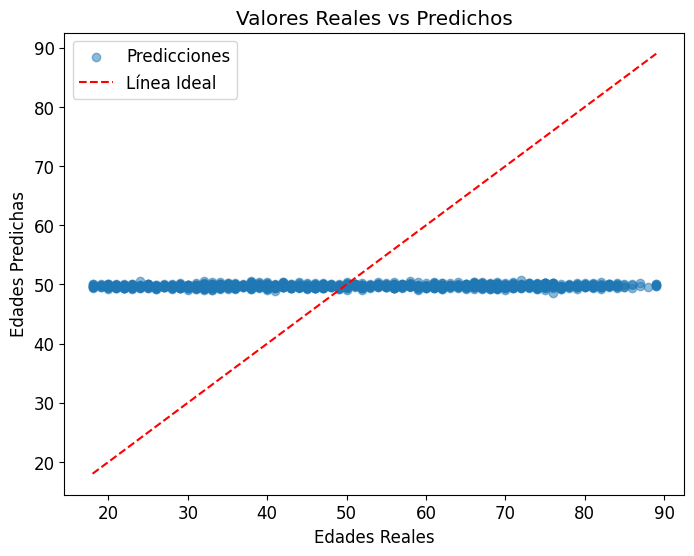

In [ ]:
# Obtener predicciones y valores reales
preds, targs = learn.get_preds(dl=dls.valid)

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(targs, preds, alpha=0.5, label="Predicciones")
plt.plot([targs.min(), targs.max()], [targs.min(), targs.max()], 'r--', label="Línea Ideal")
plt.xlabel("Edades Reales")
plt.ylabel("Edades Predichas")
plt.title("Valores Reales vs Predichos")
plt.legend()
plt.show()

In [ ]:
default_head = create_head(2048, 1)

default_head

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): fastai.layers.Flatten(full=False)
  (2): BatchNorm1d(4096, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=4096, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=1, bias=False)
)

## 3.3.1 Análisis de los resultados


- Loss en Training: 352.245331
- Loss en Validation: 333.835358
- MSE: 332.811188
- MAE: 15.802011
- R2 score: 0.001566

Vamos a analizar estos resultados:

- La pérdida en entrenamiento y en validación están bastante cercanas, lo que indica que el modelo no está sufriendo un overfitting significativo. Esto sugiere que los cambios hechos han ayudado a mantener el modelo generalizable, además, el valor de la pérdida ha disminuido en comparación con resultados previos, lo que indica que el modelo está ajustándose mejor al problema.

- MSE (Error Cuadrático Medio): 332.811188. Este valor muestra una mejora en comparación con los experimentos anteriores, esto sugiere que el modelo ha aprendido a realizar predicciones más precisas en promedio.

- MAE (Error Absoluto Medio): 15.802011. Esta métrica mide el error absoluto medio entre las edades predichas y las reales. Un valor de 15.80 años indica que en promedio las predicciones están desviadas por esa cantidad. Aunque todavía es un error considerable, esto refleja una mejora en respecto a experimentos anteriores.

- R2 score (Coeficiente de Determinación): 0.001566. Un R2 positivo (aunque muy bajo) indica que el modelo ha superado por un pequeño margen la predicción basada únicamente en la media de las edades reales. Aunque este valor sea cercano a cero, es una señal de mejora en comparación con los experimentos anteriores. Esto indica que el modelo está empezando a capturar cierta relación entre las características de entrada y las edades predichas.

## <font color='blue'>3.4. Hacemos un ajuste fino (fine-tuning) de toda la red partiendo de los pesos de ImageNet.

El Fine-Tuning, o ajuste fino, es una técnica ampliamente utilizada en aprendizaje profundo y transfer learning. Su objetivo es tomar un modelo previamente entrenado en un conjunto de datos amplio y general, y ajustarlo para una tarea específica utilizando un conjunto de datos más reducido y relacionado con dicha tarea.

El proceso de Fine-Tuning se realiza en tres etapas principales:

1. **Preentrenamiento**: Se entrena un modelo en un conjunto de datos grande y diverso (como ImageNet), obteniendo representaciones de alto nivel y características útiles que pueden transferirse a otras tareas.

2. **Transfer Learning**: Se adopta el modelo preentrenado como base para abordar una tarea nueva y relacionada. En lugar de inicializar los pesos aleatoriamente, se utilizan los pesos aprendidos en la fase de preentrenamiento.

3. **Ajuste Fino (Fine-Tuning)**: Se ajustan los pesos del modelo en el conjunto de datos específico. Durante este ajuste, se pueden modificar todas las capas del modelo o solo las últimas, dependiendo de la cantidad de datos disponibles y la similitud entre las tareas. En algunos casos, las capas iniciales del modelo permanecen congeladas para preservar las características generales aprendidas previamente.

En FastAI, el ajuste fino se implementa fácilmente con la función `learn.fine_tune(epochs, freeze_epochs)`, que opera de la siguiente manera:

1. Entrena únicamente el *head* del modelo (las capas añadidas) durante una época (por defecto, `freeze_epochs = 1`), dejando el resto de las capas congeladas.  
2. Descongela todas las capas y las entrena durante el número de épocas definido en `epochs`.

[Referencia](https://docs.fast.ai/callback.schedule.html#learner.fine_tune)

Anteriormente mencionamos que `vision_learner()` congela todas las capas del modelo excepto las del *head*. Sin embargo, como en este caso se usará `learn.fine_tune()` para gestionar el proceso, emplearemos `Learner()` en lugar de `vision_learner()`. Esto nos permite tener inicialmente todas las capas descongeladas y configurar el modelo para el Fine-Tuning. Para construir el modelo, utilizaremos la función `create_vision_model()`.

[Referencia](https://docs.fast.ai/vision.learner.html#create_vision_model)

En esta función se encuentra el parámetro `pretrained`, que controla si el modelo se inicializa con pesos preentrenados o aleatorios.

- **`pretrained = True`** (por defecto): Inicializa el modelo con pesos preentrenados en un conjunto de datos masivo como ImageNet, permitiendo aprovechar las características generales aprendidas.  
- **`pretrained = False`**: Inicializa el modelo con pesos aleatorios, entrenándolo desde cero en el conjunto de datos específico.

Esta configuración permite adaptar el modelo de manera efectiva a nuevas tareas, maximizando el aprovechamiento de los datos y los recursos disponibles.

In [ ]:
# Nuevo head (capa fully-connected con dimensionalidad adaptada a nuestro problema)
custom_head = sequential(
    nn.AdaptiveAvgPool2d(output_size = (1, 1)),
    nn.Flatten(),
    nn.Linear(in_features = 2048, out_features = 1)
)

# Modelo ResNet18 preentrenado en ImageNet con dimensionalidad adaptada a nuestro problema
pretrained_modelResNet50 = create_vision_model(models.resnet50, 1, custom_head = custom_head) #  pretrained = True por defecto

# Mostramos la arquitectura del modelo
pretrained_modelResNet50

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input,

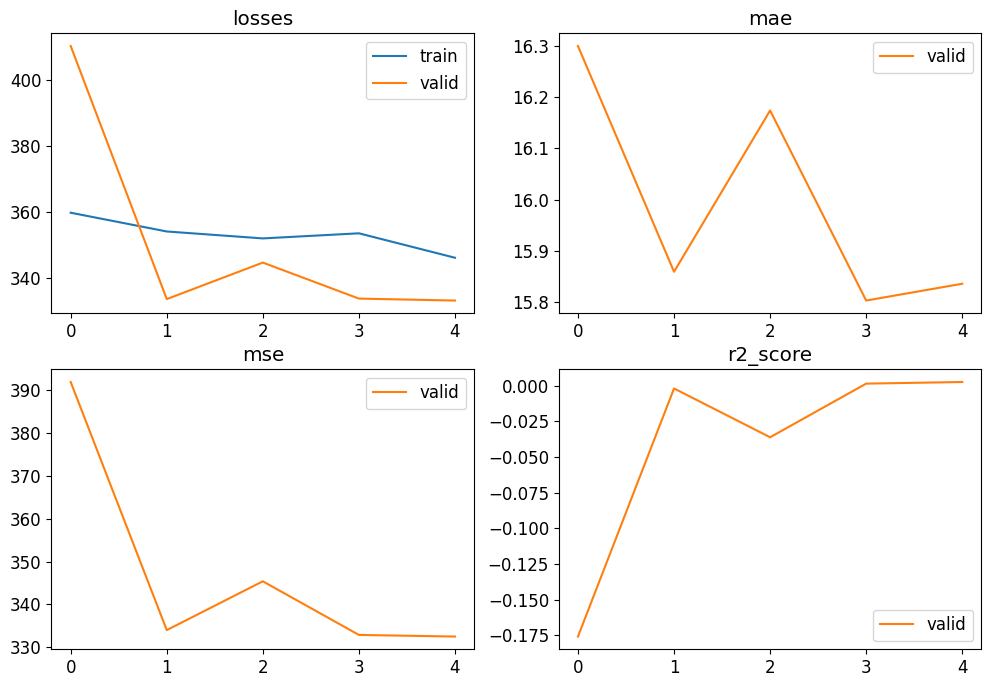


Métricas finales en validación:
MAE: 333.2929
MSE: 15.8361
R²: 332.4778



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Sequential (Input shape: 32 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

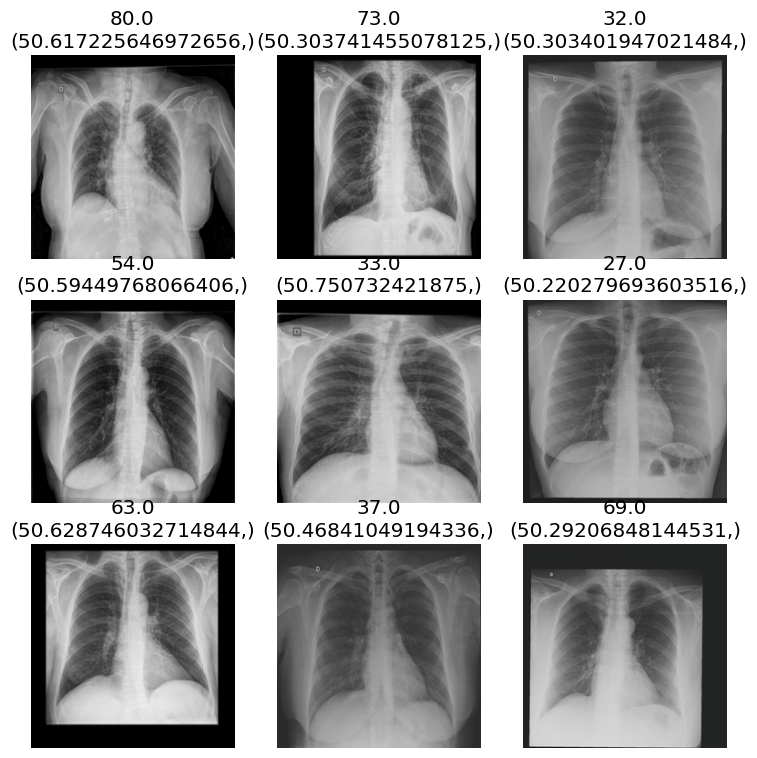

In [ ]:
# Objeto Learner
learn = Learner(dls, pretrained_modelResNet50, loss_func = nn.MSELoss(), metrics = [mae, mse, R2Score()])

# Fine-tuning
learn.fine_tune(epochs = 5)

# Mostrar la curva de accuracy en validación a lo largo de las diferentes épocas
learn.recorder.plot_metrics()


# Obtener y mostrar métricas finales en el conjunto de validación
final_metrics = learn.recorder.values[-1]
print(f'\nMétricas finales en validación:')
print(f'MAE: {final_metrics[1]:.4f}')
print(f'MSE: {final_metrics[2]:.4f}')
print(f'R²: {final_metrics[3]:.4f}\n')

# Mostrar resultados tras el entrenamiento del modelo
learn.show_results()

# Mostrar todos los detalles del objeto Learner
learn.summary()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


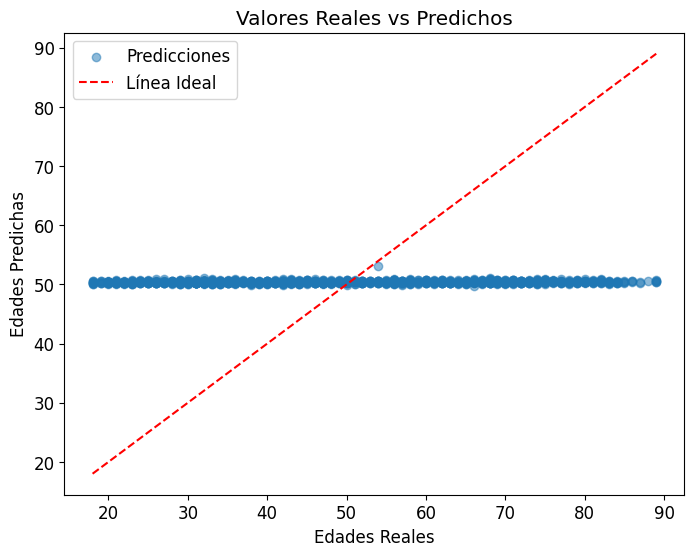

In [ ]:
# Obtener predicciones y valores reales
preds, targs = learn.get_preds(dl=dls.valid)

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(targs, preds, alpha=0.5, label="Predicciones")
plt.plot([targs.min(), targs.max()], [targs.min(), targs.max()], 'r--', label="Línea Ideal")
plt.xlabel("Edades Reales")
plt.ylabel("Edades Predichas")
plt.title("Valores Reales vs Predichos")
plt.legend()
plt.show()

## 3.4.1 Análisis de los resultados

- Loss en Training: 346.213257
- Loss en Validation: 333.292877
- MSE: 332.477814
- MAE: 15.836061
- R2 Score: 0.002567

Vamos a analizar estos resultados:

- La pérdida en entrenamiento es ligeramente mayor que la de los experimentos previos, pero la pérdida en validación es la más baja obtenida hasta ahora. Esto sugiere que el modelo ha logrado mejorar su capacidad de generalización hacia los datos de validación. La cercanía entre ambas pérdidas indica un equilibrio entre bias y varianza y sin señales evidentes de overfitting.
- MSE (Error Cuadrático Medio): 332.477814. El MSE ha mejorado marginalmente en comparación con los experimentos anteriores, aunque la mejora sea leve esta reducción confirma que el modelo está aprendiendo mejor a reducir los errores grandes en las predicciones.
- MAE (Error Absoluto Medio): 15.836061. Este resultado ha emporado ligeramente en comparación con el ajuste de solo la cabecera. Esto indica que, si bien el modelo ha reducido los errores grandes (reflejado en el resultado obtenido en el MSE), el promedio absoluto de los errores no ha mejorado de forma significativa. El modelo está mejorando probablemente en casos extremos pero no en los más comunes.
- R2 Score (Coeficiente de Determinación): 0.002567. Es el mejor valor obtenido hasta hora, aunque siga siendo muy bajo esto confirma que el modelo está explicando ligeramente más la variabilidad en los datos reales. Sin embargo, sigue lejos de capturar patrones fuertes que permitan una predicción confiable.

## <font color='blue'>Conclusiones. ¿Qué conclusiones se pueden extraer en base a toda la experimentación anterior? En caso de que nos enfrentemos a un nuevo problema, ¿qué opción, u opciones, de entre las anteriores, parece a priori la más razonable? ¿Por qué?

### **Conclusiones Generales Basadas en la Experimentación**

#### **1. Resumen de los enfoques probados**
1. **Entrenamiento desde cero (from scratch):**
   - **Rendimiento**: MSE = 333.56, MAE = 15.89, R² = -0.0011  
   - Entrenar todo desde pesos aleatorios demostró ser subóptimo. Aunque la pérdida en validación es aceptable, las métricas indican que el modelo no está explicando adecuadamente la variabilidad en los datos (R² negativo). Esto es esperable ya que la tarea requiere aprender completamente desde cero sin aprovechar información previa.

2. **Extractor de características (entrenando solo la cabecera personalizada):**
   - **Rendimiento**: MSE = 354.58, MAE = 16.29, R² = -0.0638  
   - Este enfoque, que congela la base de ResNet50 y ajusta solo la cabecera personalizada, tuvo el peor desempeño en términos de MSE, MAE y R². Esto sugiere que los pesos preentrenados de la base no eran directamente transferibles al dominio específico de las radiografías.

3. **Extractor de características (entrenando la cabecera por defecto de FastAI):**
   - **Rendimiento**: MSE = 332.81, MAE = 15.80, R² = 0.0016  
   - Entrenar la cabecera proporcionada por FastAI produjo un mejor resultado que diseñar una cabecera personalizada. Esto podría deberse a que la cabecera predefinida está mejor optimizada para aprovechar las características extraídas por ResNet50. Este enfoque comienza a obtener un **R² positivo**, aunque aún está lejos de ser significativo.

4. **Fine-tuning completo desde pesos preentrenados en ImageNet:**
   - **Rendimiento**: MSE = 332.48, MAE = 15.83, R² = 0.0026  
   - Ajustar toda la red permitió aprovechar los pesos preentrenados mientras se adaptaban completamente al nuevo problema. Este enfoque obtuvo las mejores métricas, aunque las mejoras son marginales.

---

#### **2. Interpretación de los resultados**

1. **Dificultad del problema:**  
   Todas las configuraciones presentan métricas que, aunque consistentes, muestran que el modelo tiene dificultades para explicar la variabilidad en los datos (R² apenas positivo en los mejores casos). Esto sugiere que:
   - Las imágenes podrían no contener suficiente información visual relevante para predecir la edad con precisión.
   - El rango de edades (18-89 años) y la naturaleza del problema (regresión en imágenes médicas) podrían requerir arquitecturas o estrategias más especializadas.

2. **Importancia de los pesos preentrenados:**  
   Los experimentos muestran que el uso de pesos preentrenados (ya sea en modo extractor de características o mediante fine-tuning) produce mejores resultados que el entrenamiento desde cero. Esto valida la idea de transfer learning como un punto de partida sólido en problemas con conjuntos de datos limitados.

3. **Mejor configuración:**  
   El **fine-tuning completo** fue el enfoque más efectivo, aunque con mejoras marginales. Esto se debe a que:
   - Permite adaptar tanto las capas superiores como las capas profundas a las características del conjunto de datos.
   - Aprovecha patrones generales de ImageNet y los ajusta a este problema específico.

---

### **Aportes para un problema futuro**

1. **Estrategia preferida: Fine-tuning completo con pesos preentrenados**  
   Este enfoque aprovecha el conocimiento previo de modelos como ResNet50 y permite una adaptación completa al nuevo dominio. Aunque requiere más recursos computacionales, es la opción más prometedora para mejorar el rendimiento en problemas similares.  

2. **Considerar ajustes adicionales:**
   - **Data Augmentation:** Para mejorar la generalización, aplicar transformaciones específicas al contexto médico (e.g., rotaciones limitadas, cambios en contraste/brillo).
   - **Hiperparámetros:** Optimizar learning rates, batch sizes y regularización para cada nuevo conjunto de datos.
   - **Arquitecturas avanzadas:** Probar modelos como EfficientNet o redes convolucionales diseñadas específicamente para imágenes médicas, que podrían superar las limitaciones de ResNet50.

3. **Alternativas para problemas difíciles:**
   - **Redes multimodales:** Combinar datos de imágenes con información clínica tabular (si está disponible) podría aumentar el rendimiento en problemas de regresión médica.
   - **Modelos con mayor capacidad:** Probar redes más profundas o grandes, como ResNet101 o modelos transformer-based, si el tamaño del conjunto de datos lo permite.

---

### **Conclusión Final**

El **fine-tuning completo de ResNet50 con pesos preentrenados en ImageNet** es la estrategia más razonable para problemas similares, ya que:
1. Aprovecha conocimientos generales y los adapta al dominio específico.
2. Ofrece el mejor rendimiento con mejoras progresivas en todas las métricas.

No obstante, las métricas actuales sugieren que las imágenes de radiografías podrían no contener información suficiente por sí solas para realizar predicciones precisas de la edad.